In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from lib.plots import load_data, climatology, single_column_initial_value, training as tp, get_error_tables

import seaborn as sns


width = 5.5
dpi = 100

sns.set_context("paper")
sns.set_style("white", {
    'figure.figsize' : (5.51, 5.51/1.61),
    'figure.dpi': 100,
    'image.cmap': 'viridis',
    'xtick.major.size': 3.5,
    'xtick.major.size': 3.5,
    'xtick.minor.size' : 1.75,
    'xtick.minor.visible' : True,
    'ytick.major.size': 3.5,
})


I put the styling commands in the following few boxes

In [2]:
# plt.style.use(["default", "paper.style"])
width = 5.5
dpi = 100
# this magic needs to happen after I reset the rcParams
plt.rc("figure", dpi=150)

Here, I load the data and select the testing region.

In [3]:
ds= load_data(best_nn="model.VaryT-20/3")
ds_test = ds.isel(x=slice(0,64))

/Users/noah/anaconda/envs/uw-machine-learning/lib/python3.6/site-packages/metpy/calc/tools.py:692: UserWarning: Interpolation point out of data bounds encountered
  warnings.warn('Interpolation point out of data bounds encountered')


# Figure 2: Training Process

In [4]:
nhid, data = tp.get_plotting_data("../../data/output/")

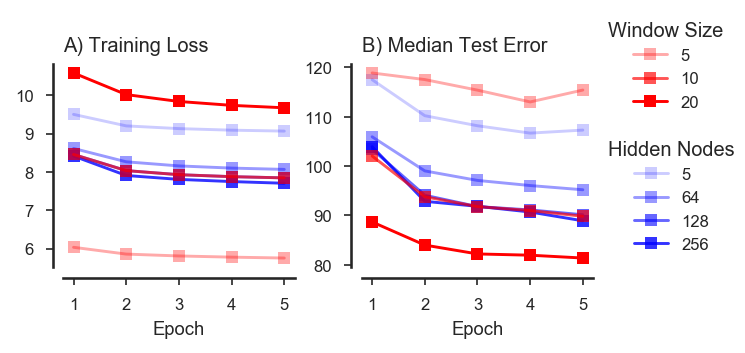

In [5]:
data = tp.get_plotting_data("../../data/output/")
axs = tp.plot_epochs_vs_loss(data)
plt.savefig("/Users/noah/Dropbox/fig2.pdf")

# Table 1: Hyper Parameters

In [6]:
df = get_error_tables("../../data/output/test_error.nc")
df

$n$ $T$ Apparent Source $R^2$              64 Step Error               
                           $q_T$        $s_L$         $q_T$          $s_L$
0  128   2           0.64 (0.04)  0.75 (0.06)  7.03 (12.44)  11.93 (20.87)
1  128   5           0.64 (0.05)  0.76 (0.06)   0.43 (0.14)    0.77 (0.18)
2  128  10           0.62 (0.02)  0.75 (0.02)   0.53 (0.07)    0.85 (0.09)
3  128  20           0.57 (0.05)  0.74 (0.06)   0.26 (0.03)    0.52 (0.02)
4  128  40           0.47 (0.05)  0.70 (0.05)   0.25 (0.02)    0.50 (0.03)
5    5  10           0.58 (0.03)  0.72 (0.07)   0.53 (0.21)    0.99 (0.35)
6   64  10           0.62 (0.05)  0.75 (0.06)   0.39 (0.09)    0.77 (0.09)
7  128  10           0.62 (0.02)  0.75 (0.02)   0.53 (0.07)    0.85 (0.09)
8  256  10           0.61 (0.03)  0.75 (0.01)   0.35 (0.05)    0.62 (0.03)

Copy paste this into the latex file.

In [7]:
print(df.to_latex(index=False, escape=False))

\begin{tabular}{rrllll}
\toprule
 $n$ & $T$ & \multicolumn{2}{l}{Apparent Source $R^2$} & \multicolumn{2}{l}{64 Step Error} \\
     &                 $q_T$ &        $s_L$ &         $q_T$ &          $s_L$ \\
\midrule
 128 &   2 &           0.64 (0.04) &  0.75 (0.06) &  7.03 (12.44) &  11.93 (20.87) \\
 128 &   5 &           0.64 (0.05) &  0.76 (0.06) &   0.43 (0.14) &    0.77 (0.18) \\
 128 &  10 &           0.62 (0.02) &  0.75 (0.02) &   0.53 (0.07) &    0.85 (0.09) \\
 128 &  20 &           0.57 (0.05) &  0.74 (0.06) &   0.26 (0.03) &    0.52 (0.02) \\
 128 &  40 &           0.47 (0.05) &  0.70 (0.05) &   0.25 (0.02) &    0.50 (0.03) \\
   5 &  10 &           0.58 (0.03) &  0.72 (0.07) &   0.53 (0.21) &    0.99 (0.35) \\
  64 &  10 &           0.62 (0.05) &  0.75 (0.06) &   0.39 (0.09) &    0.77 (0.09) \\
 128 &  10 &           0.62 (0.02) &  0.75 (0.02) &   0.53 (0.07) &    0.85 (0.09) \\
 256 &  10 &           0.61 (0.03) &  0.75 (0.01) &   0.35 (0.05) &    0.62 (0.03) \\
\bottomrul

# Figure 6: Forced Single Column

In [8]:

def plot_t_vs_p(loc, axs, cax=None,
    models = ('Truth', 'Neural Network', 'CAM'),
    levels = np.arange(11)*2, text_kwargs=dict(),
             **kwargs,):
    

    for model, ax in zip(models, axs):
        val = loc.sel(model=model)
        im = ax.contourf(val.time, val.p, val.T, levels=levels, **kwargs)
        ax.contour(val.time, val.p, val.T, levels=levels, linewidths=.1, **kwargs)
    
        # add labels
        plt.text(.04, .8, model, transform=ax.transAxes, fontsize=10, **text_kwargs)

#     axs[0].invert_yaxis()


#     plt.colorbar(im, orientation='vertical', pad=.01, **cbar_kwargs, )
    
    return im

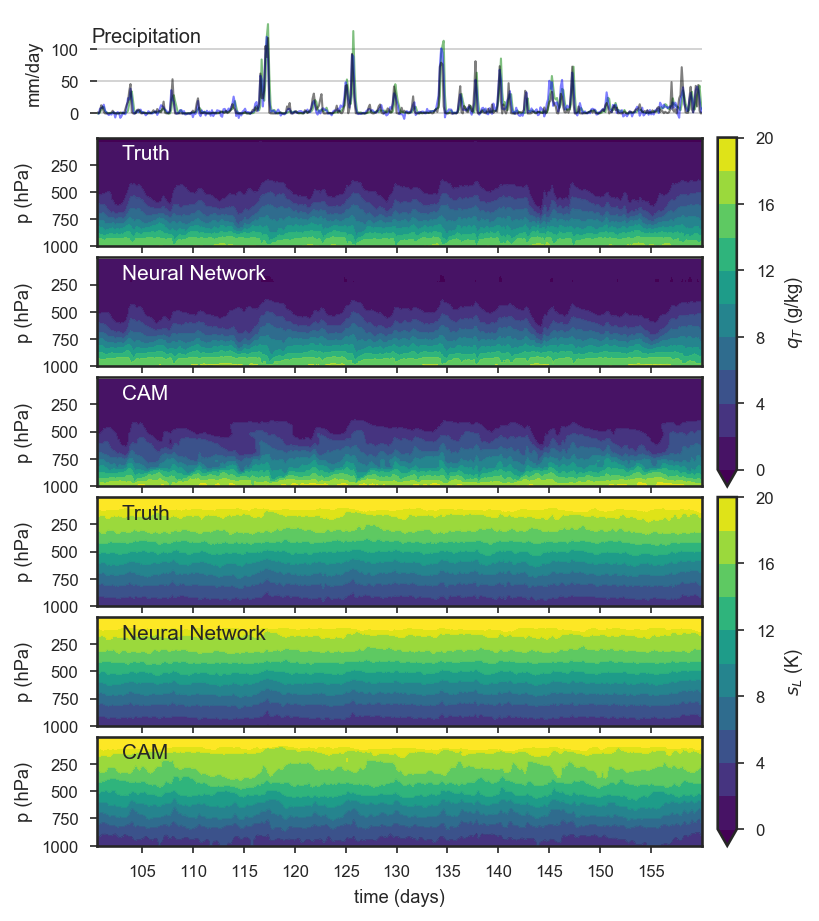

In [9]:
loc = ds.isel(x=10, y=8)

from matplotlib import gridspec


fig = plt.figure(figsize=(width, 6))
gs = gridspec.GridSpec(7, 2, width_ratios=(.95, .03),
                      height_ratios=[1]*7,
                       wspace=.05,
                      hspace=.1,
                      bottom=.07, top=.99)

# precip
axp = fig.add_subplot(gs[0, 0])
colors = {'Truth': 'k', 'CAM': 'g', 'Neural Network': 'b'}
for model, value in loc.groupby('model'):
    axp.plot(value.time, value.prec.squeeze(), label='model',
            linewidth=1.0, c=colors[model], alpha=.5)
    
for spine in set(axp.spines):
    axp.spines[spine].set_color('none')
axp.xaxis.set_visible(False)
axp.set_yticks([0, 50, 100])
axp.set_ylabel("mm/day")
axp.grid(axis='y')
axp.text(100, 110, 'Precipitation')
axp.set_xlim([ds.time.min(), ds.time.max()])

# humidity
axsq = [fig.add_subplot(gs[i, 0], sharex=axp) for i in range(1,4)]
imq = plot_t_vs_p(loc.qt, axsq, extend='min', text_kwargs={'color': 'white'})
cb = fig.colorbar(imq, cax=fig.add_subplot(gs[1:4, 1]))
cb.set_label(r"$q_T$ (g/kg)")

# temperature
axst = [fig.add_subplot(gs[i, 0], sharex=axp) for i in range(4,7)]
plot_t_vs_p(loc.sl, axst, extend='max', levels=np.arange(11)*5 + 290)
cb = fig.colorbar(imq, cax=fig.add_subplot(gs[4:, 1]))
cb.set_label(r"$s_L$ (K)")


# fix axes
for ax in axsq + axst:
    ax.set_ylabel('p (hPa)')
    ax.set_yticks([1000, 750, 500, 250])
    ax.set_ylim([1000, 0])
    
#     ax.set_xticklabels([1])
    
axp.set_xlim([100.625, 160])
axp.set_xticks(np.r_[105:160:5])

axst[-1].set_xlabel("time (days)")

plt.savefig("/Users/noah/Dropbox/fig6.pdf", bbox='tight')

# Figure 7:  Equilibrium

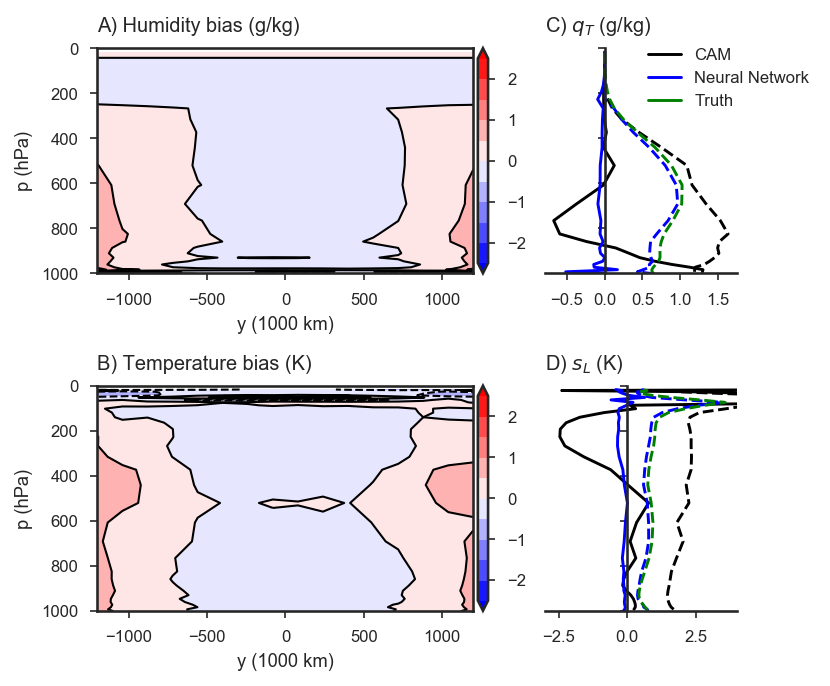

In [10]:
with plt.rc_context({'axes.titlepad': 8.0}):
    climatology.plot(ds_test, width=width)
    plt.savefig("/Users/noah/Dropbox/fig7.pdf")

# Figure 6: Precipitation

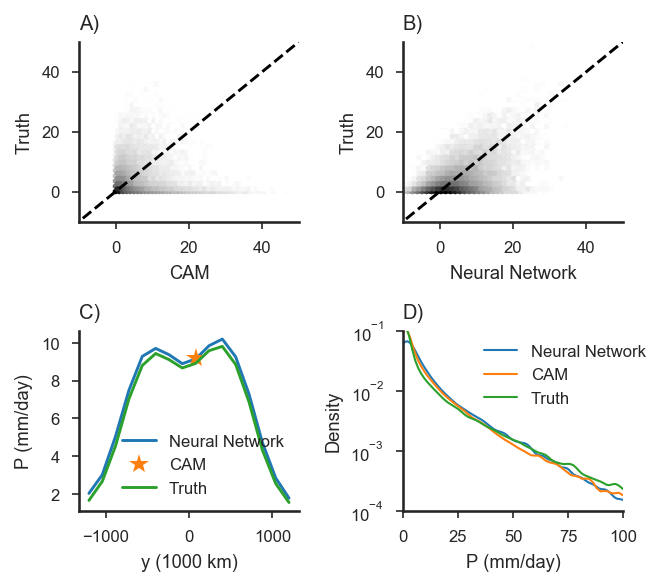

In [11]:
from matplotlib.colors import LogNorm
from scipy.stats import norm, gaussian_kde
from lib.plots.common import despine

def plot_mean_precip(ax, ds, title=""):
    prec = ds.prec.mean(['x', 'time']).to_dataset(dim='model')
    
    key = 'Neural Network'
    ax.plot(prec.y/1000, prec[key], label=key)
    
    key = 'CAM'
    ax.plot(prec.y/1000, prec[key], label=key, marker='*', markersize=10,
           ls="")
    
    key = 'Truth'
    ax.plot(prec.y/1000, prec[key], label=key)
    
    ax.set_title(title, loc="left")
    
    ax.set_xlabel("y (1000 km)")
    ax.set_ylabel("P (mm/day)")
    ax.legend()
    
def plot_hexbin(ax, x, y, ds, title="", **kwargs):
    prec = ds.prec.to_dataset(dim="model").isel(y=8)

    xn = prec[x].fillna(1000).values.ravel()
    yn = prec[y].fillna(1000).values.ravel()
    
    mask = ( xn < 100) & (yn < 100) 
    xn = xn[mask]
    yn = yn[mask]
    
    ax.hexbin(xn, yn, cmap='Greys', norm=LogNorm(10), rasterized=True)
    ax.plot((-200,200), (-200,200), 'k--')
    
    ax.set_xlim([-10, 50])
    ax.set_ylim([-10, 50])
    
    ax.set_xlabel(f"{x}")
    ax.set_ylabel(f"{y}")
    ax.set_title(title, loc="left")
    
    
    
def plot_dist(ax, x,  ds, title=""):
    prec = ds.prec.to_dataset(dim='model').isel(y=8)
    df = prec.to_dataframe()
    df = df.dropna().drop('y', 1)
    
    qtiles = np.linspace(0, 100, 200)[1:-1]
    a = np.percentile(df[x], qtiles)
    
    v = df[x]
    kernel = gaussian_kde(np.concatenate([v]))
    pos = np.linspace(v.min(), v.max(), 200)
    ax.set_xlim([0, 100])
    ax.semilogy(pos, kernel(pos), label=x, lw=1.0)

    ax.set_ylim([1e-4, 1e-1])
    ax.set_title(title, loc="left")
    
    ax.set_xlabel('P (mm/day)')
    ax.set_ylabel("Density")
    
    
def precip_plots(ds):


    fig, axs = plt.subplots(2, 2, figsize=(4.5, 4))
    axcam, axnn, axlat, axpdf = axs.flat

    plot_mean_precip(axlat, ds, title="C)")

    plot_hexbin(axcam, "CAM", "Truth", ds, title="A)")
    plot_hexbin(axnn, "Neural Network", "Truth", ds, title="B)")

    plot_dist(axpdf, "Neural Network", ds)
    plot_dist(axpdf, "CAM", ds)
    plot_dist(axpdf, "Truth", ds, title="D)")

    for ax in axs.flat:
        despine(ax)

    axpdf.legend(bbox_to_anchor=(.3, .5))
    plt.tight_layout()


precip_plots(ds)
plt.savefig("/Users/noah/Dropbox/precip.pdf")

# Transient Error growth (qt)

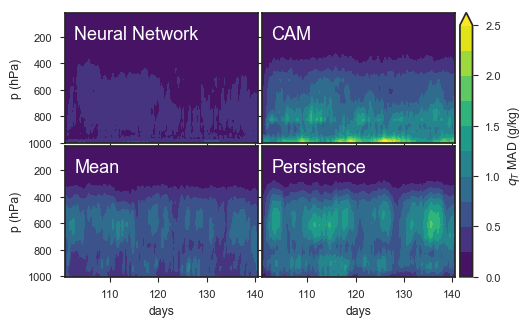

In [12]:
import lib.plots.transient_error as te
from toolz import valmap
from toolz.curried import get

mad = te.compute_errors(te.mean_absolute_dev, ds_test.isel(y=8), dims=['x'])
mad_qt = valmap(get('qt'), mad)
_, cb = te.plot_mses(mad_qt, levels=np.arange(11)*.25,
                  extend='max',
                  label='$q_T$ MAD (g/kg)')

plt.savefig("/Users/noah/Dropbox/errqt.png")

# Transient Error growth (sl)

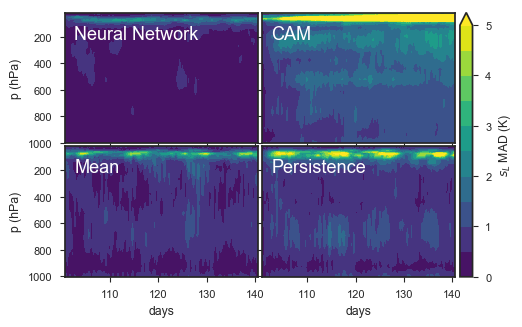

In [13]:
mad_sl = valmap(get('sl'), mad)
_, cb = te.plot_mses(mad_sl, levels=np.arange(11)*.5,
                  extend='max',
                  label='$s_L$ MAD (K)')
plt.savefig("/Users/noah/Dropbox/errqSl.png")

# Column Averaged Errors

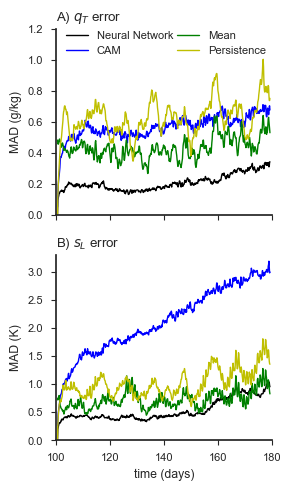

In [14]:
axs = te.plot_column_error(ds_test.isel(y=8));
plt.savefig("/Users/noah/Dropbox/errCol.pdf")